# Support Vector Machine

### Import required packages

In [1]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [2]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator

## Two-Class Classification Problem

### Generate the data

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((100, 2))
y = np.array([-1]*50+[1]*50)

### Are these data linearly separable?

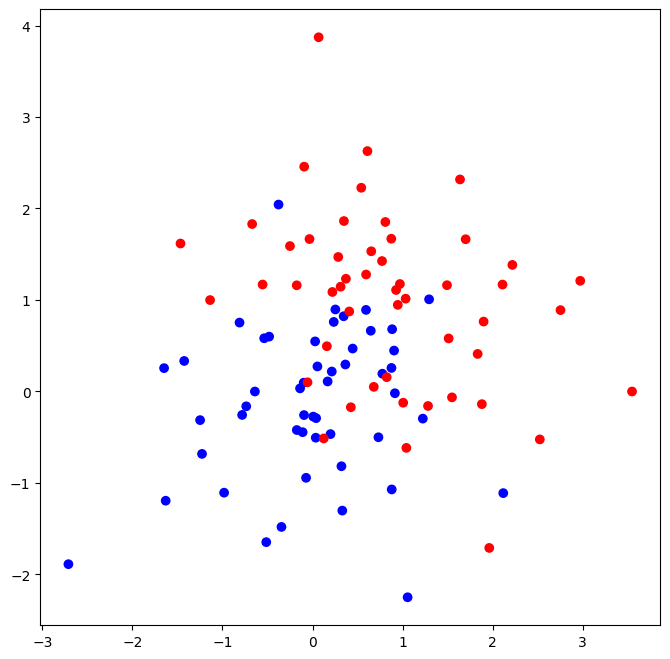

In [4]:
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
        X[:,1],
        c=y,
        cmap=cm.bwr)

## Fit a Support Vector Classfier

In [5]:
svm_linear = SVC(C=10, kernel = 'linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

### Plot the Decision Boundary

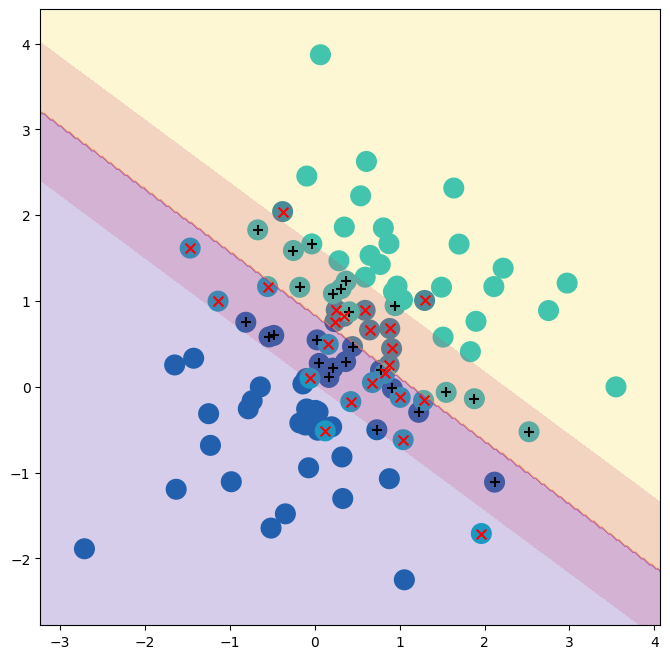

In [6]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear, ax=ax)

### Rerun the model with smaller value of C - a larger number of support vectors

In [7]:
svm_linear2 = SVC(C=0.1, kernel = 'linear')
svm_linear2.fit(X, y)

SVC(C=0.1, kernel='linear')

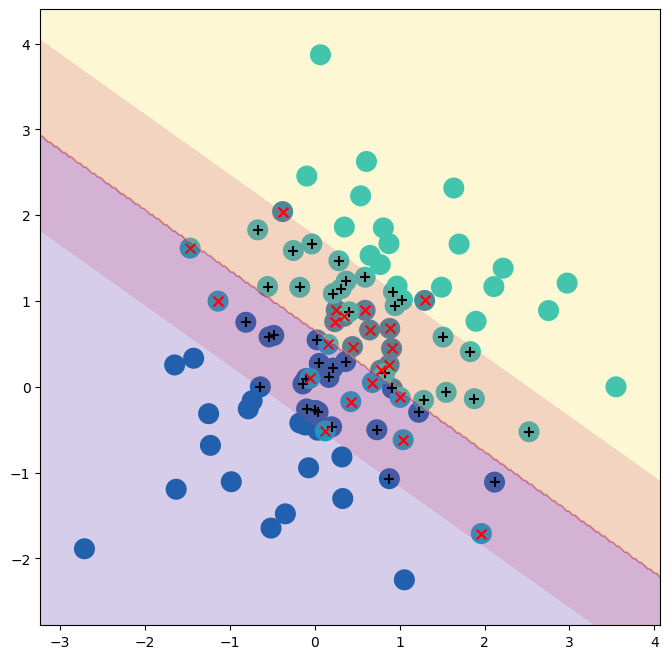

In [8]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear2, ax=ax)

### Extract the coefficients of a linear boundary

In [9]:
svm_linear.coef_

array([[0.91505953, 1.24563919]])

### Tune the model

In [10]:
kfold = skm.KFold(5, 
                  random_state = 0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear, 
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold, 
                        scoring='accuracy')
grid.fit(X,y)

# what's the best model?
grid.best_params_

{'C': 1}

### Print the accuracy of cross-validate model

In [11]:
grid.cv_results_[('mean_test_score')]

array([0.48, 0.66, 0.71, 0.72, 0.71, 0.72, 0.72])

### Generate test data

In [12]:
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] +=1

### Predict Class labels and print Confusion Matrix

In [13]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)

### Generate Confusion Matrix

In [14]:
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


## Fit a Support Vector Machine

In [15]:
X = rng.standard_normal((300, 2))
X[:100] += 2
X[100:200] -= 2
y = np.array([1]*150+[2]*150)

### Check the non-linear boundary

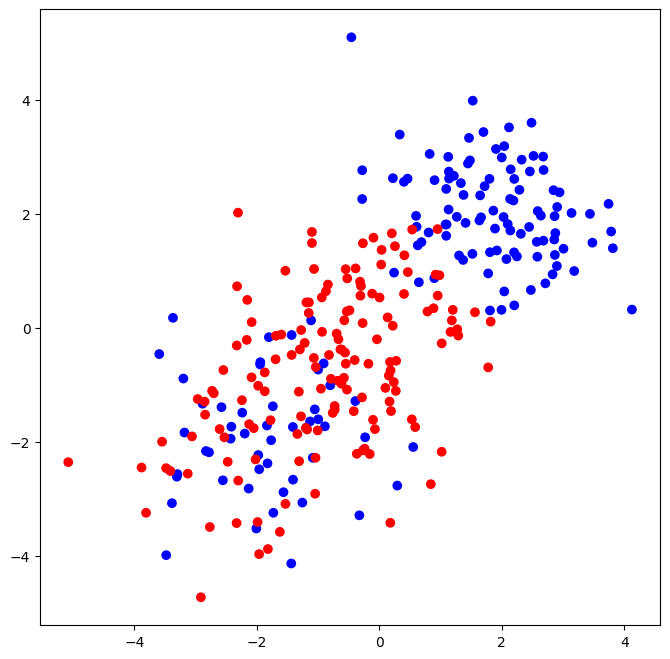

In [16]:
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.bwr)

### Run a SVM model with a RBF kernel

In [17]:
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)

svm_rbf = SVC(kernel="rbf", gamma=1, C= 1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

### Check the boundary of Support Vector Machine

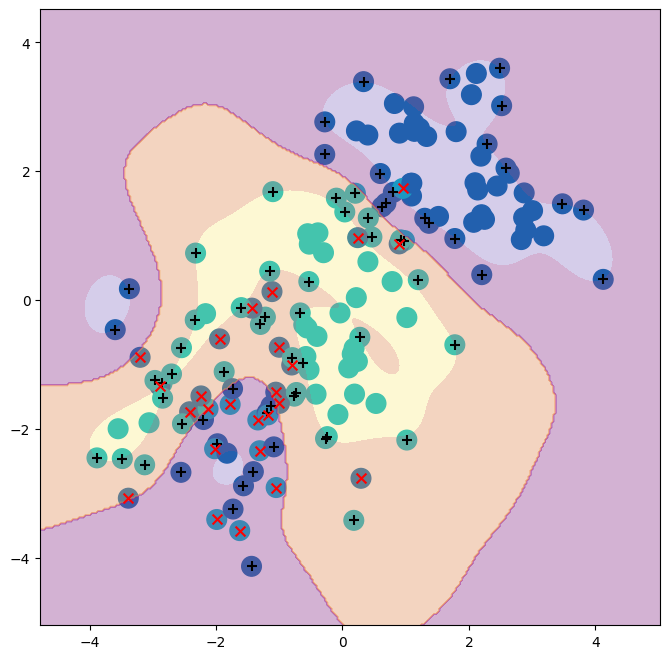

In [18]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, 
         y_train, 
         svm_rbf, 
         ax=ax)

### Use Cross-Validation to select the best choice of gamma and C

In [19]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf, 
                        {'C':[0.1,1,10,100,1000],
                        'gamma':[0.5,1,2,3,4]}, 
                        refit=True, 
                        cv=kfold, 
                        scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 1}

### Generate the best SVM plot

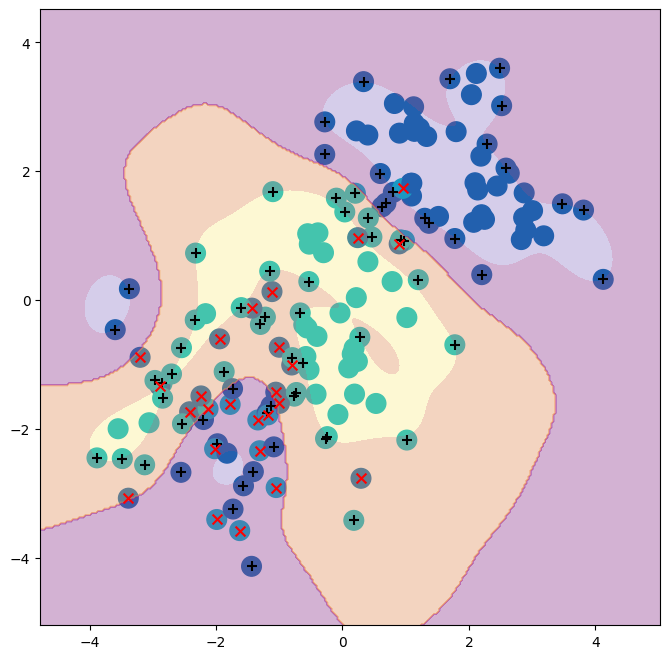

In [20]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train, 
         y_train, 
         best_svm, 
         ax=ax)
y_hat_test = best_svm.predict(X_test)

### Generate the Confusion Matrix

In [21]:
confusion_table(y_hat_test , y_test)

Truth,1,2
Predicted,,
1,56,14
2,16,64
